# Stanford 40
### Download the dataset

In [1]:
import requests

response_stanford40_imgs = requests.get("http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip")
if response_stanford40_imgs.status_code == 200:
    print("Data download successful")
else:
    print("Data download failed")

response_stanford40_splits = requests.get("http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip")
if response_stanford40_splits.status_code == 200:
    print("Splits download successful")
else:
    print("Splits download failed")

Data download successful
Splits download successful


### Unzip data

In [2]:
import io
import zipfile

with zipfile.ZipFile(io.BytesIO(response_stanford40_imgs.content), "r") as zip_ref:
    zip_ref.extractall("Stanford40/")

with zipfile.ZipFile(io.BytesIO(response_stanford40_splits.content), "r") as zip_ref:
    zip_ref.extractall("Stanford40/")

### Read the train and test splits, combine them and make better splits to help training networks easier

In [3]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse",
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]

with open("Stanford40/ImageSplits/train.txt", "r") as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open("Stanford40/ImageSplits/test.txt", "r") as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

### Visualize a photo from the training files and also print its label

An image with the label - riding_a_bike


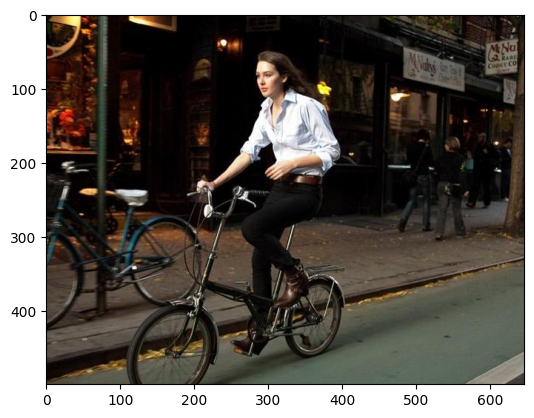

In [4]:
import cv2
from matplotlib import pyplot as plt

image_no = 234  # [0, 1200]
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f'An image with the label - {train_labels[image_no]}')
plt.imshow(img_rgb)
plt.show()

# Human Motion Database 51 (HMDB51)
### Download the dataset

In [5]:
import os

response_hmdb51_imgs = requests.get("http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar")
if response_hmdb51_imgs.status_code == 200:
    print("Data download successful")
    with open("hmdb51_org.rar", "wb") as f:
        f.write(response_hmdb51_imgs.content)
else:
    print("Data download failed")
    
response_hmdb51_splits = requests.get("http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar")
if response_hmdb51_splits.status_code == 200:
    print("Splits download successful")
    with open("test_train_splits.rar", "wb") as f:
        f.write(response_hmdb51_splits.content)
else:
    print("Splits download failed")

Data download successful
Splits download successful


### Extract and organize the data

In [6]:
import shutil
import patoolib

os.makedirs("video_data", exist_ok=True)
os.makedirs("test_train_splits", exist_ok=True)

os.makedirs("temp", exist_ok=True)
patoolib.extract_archive("test_train_splits.rar", outdir="temp")
for file in os.listdir(os.path.join("temp", "testTrainMulti_7030_splits")):
    shutil.move(os.path.join("temp", "testTrainMulti_7030_splits", file), "test_train_splits")
shutil.rmtree("temp")
os.remove("test_train_splits.rar")

# Define the source and destination directory paths
patoolib.extract_archive("hmdb51_org.rar", outdir="video_data")
os.remove("hmdb51_org.rar")

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]

for file in os.listdir("video_data"):
    foldername = file.split(".")[0]
    if foldername in keep_hmdb51:
        # Extract only the relevant classes
        os.makedirs(os.path.join("video_data", foldername), exist_ok=True)
        patoolib.extract_archive(os.path.join("video_data", file), outdir="video_data")
    os.remove(os.path.join("video_data", file))

patool: Extracting test_train_splits.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -otemp -- test_train_splits.rar
patool:     with creationflags=134217728
patool: ... test_train_splits.rar extracted to `temp'.
patool: Extracting hmdb51_org.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -ovideo_data -- hmdb51_org.rar
patool:     with creationflags=134217728
patool: ... hmdb51_org.rar extracted to `video_data'.
patool: Extracting video_data\clap.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -ovideo_data -- video_data\clap.rar
patool:     with creationflags=134217728
patool: ... video_data\clap.rar extracted to `video_data'.
patool: Extracting video_data\climb.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -ovideo_data -- video_data\climb.rar
patool:     with creationflags=134217728
patool: ... video_data\climb.rar extracted to `video_data'.
patool: Extracting video_data\drink.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -ovideo_

### Split the dataset into train and test

In [7]:
import glob

TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join("test_train_splits", split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split(os.sep)[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.